# Lab 3: Numerical Methods for Macroeconomists
## The Research Architect Approach: Solvers, Shocks, and Version Control

---

### 🎯 Lab Philosophy

In Lab 2, we learned **Algorithmic Thinking** (writing loops). In Lab 3, we stop writing raw loops for math problems and start using **Scientific Libraries** (`scipy`). 

A Research Architect does not re-invent the wheel. You don't write a root-finding algorithm from scratch unless you have to; you use robust, optimized industry-standard libraries. Your job is to:
1.  **Formulate** the economic problem mathematically.
2.  **Select** the correct numerical tool (Root-finding? Minimization? Interpolation?).
3.  **Direct** the AI to implement it using `scipy`.
4.  **Validate** the results against economic theory (FOCs, market clearing).

### 📚 Coverage

**Part 0: The Time Machine (Git)**
- Setting up version control to save your research progress.

**Part 1: Root-Finding (Market Equilibrium)**
- Solving $Supply = Demand$ using `scipy.optimize`.

**Part 2: Optimization (The Household Problem)**
- Maximizing Utility using `scipy.optimize.minimize`.

**Part 3: Interpolation (Production Functions)**
- Approximating data between points using `scipy.interpolate`.

**Part 4: Stochastic Processes (AR(1))**
- Discretizing continuous shocks into Markov Chains (Tauchen Method).

---

# Part 0: The Time Machine (Git)

Before we write code, we must ensure we don't lose it. In computational economics, "Version Control" is standard practice. It allows you to save "checkpoints" of your work and collaborate with others.

## 1. The Concept
- **Repository (Repo)**: The folder where your project lives.
- **Commit**: A snapshot of your code at a specific moment.
- **Push**: Sending that snapshot to the cloud (GitHub).

## 2. AI-Augmented Setup

Since Git commands are run in the terminal (not Python), let's ask the AI for the specific commands.

----
💡 **AI Prompt Template: Git Setup**

"I have a folder with my Jupyter Notebooks. I want to start using Git.
Please provide the terminal commands to:
1. Initialize a new git repository in the current folder.
2. Create a `.gitignore` file that excludes `__pycache__` and `.ipynb_checkpoints`.
3. Add my notebook `Lab3.ipynb` to the staging area.
4. Commit the file with the message 'Initial commit of Lab 3'."
----

**Action:** Open your terminal (in VS Code, `Ctrl+` `) and try running the commands the AI provides.

# Part 1: Root-Finding (Market Equilibrium)

## 1. Mathematical Formulation
Consider a non-linear market:
- **Demand:** $Q_d(p) = 100 p^{-0.5}$
- **Supply:** $Q_s(p) = e^{0.5 p} - 1$

Equilibrium occurs where **Excess Demand** is zero:
$$f(p) = Q_d(p) - Q_s(p) = 0$$

## 2. Algorithmic Selection
We need to find the "root" of $f(p)$. We will use the **Brent Method** (a robust variation of Bisection and Secant) available in `scipy`.

## 3. AI-Augmented Implementation

Equilibrium Price p*: 7.2786
Did it converge? True
Excess Demand at p*: -0.0000000000


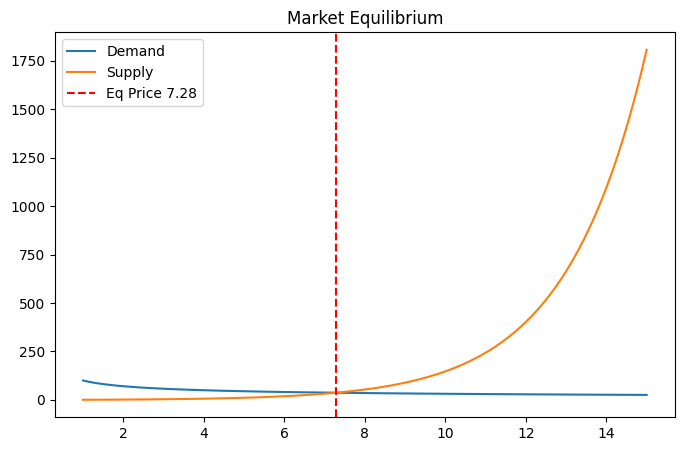

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# 1. Define the Economic Functions
def demand(p):
    return 100 * p**(-0.5)

def supply(p):
    return np.exp(0.5 * p) - 1

def excess_demand(p):
    return demand(p) - supply(p)

# 2. Solve for the Root
# We know p must be positive. Let's guess between 0.1 and 20.
sol = optimize.root_scalar(excess_demand, bracket=[0.1, 20], method='brentq')

p_star = sol.root
print(f"Equilibrium Price p*: {p_star:.4f}")
print(f"Did it converge? {sol.converged}")

# 3. Validation (Check the residual)
residual = excess_demand(p_star)
print(f"Excess Demand at p*: {residual:.10f}")

# 4. Visualization
p_grid = np.linspace(1, 15, 100)
plt.figure(figsize=(8, 5))
plt.plot(p_grid, demand(p_grid), label='Demand')
plt.plot(p_grid, supply(p_grid), label='Supply')
plt.axvline(p_star, color='r', linestyle='--', label=f'Eq Price {p_star:.2f}')
plt.legend()
plt.title('Market Equilibrium')
plt.show()

## 4. Critical Validation
The code found a number, but is it right?
- **Economic Logic:** Look at the plot. Do the lines cross at the red line? Yes.
- **Numerical Logic:** Is `Excess Demand` close to $0$? Yes ($10^{-12}$ is essentially zero).

# Part 2: Optimization (Consumer Choice)

Economics is the study of optimization constraints. We often need to find the maximum of a function.

## 1. Mathematical Formulation
Maximize Utility:
$$\max_{x} U(x) = - (x - 5)^2 + 10$$

## 2. Algorithmic Selection
Standard solvers in Python **minimize** functions. To maximize $U(x)$, we minimize $-U(x)$.

## 3. AI-Augmented Implementation

----
💡 **AI Prompt Template: Optimization**

"I need to maximize the function $-(x-5)^2 + 10$ using `scipy.optimize`. 
Please write a script that:
1. Defines the objective function (remember to flip the sign for minimization).
2. Uses `minimize` with an initial guess of $x_0=0$.
3. Prints the optimal x and the maximum utility value."
----

In [2]:
# Objective function (Negative Utility because we minimize)
def neg_utility(x):
    return -(-(x - 5)**2 + 10)

# Optimization
result = optimize.minimize(neg_utility, x0=0)

x_opt = result.x[0]
max_util = -result.fun

print(f"Optimal x: {x_opt:.4f}")
print(f"Maximum Utility: {max_util:.4f}")
print(f"Analytical solution (x=5, U=10). Error: {abs(x_opt - 5):.6f}")

Optimal x: 5.0000
Maximum Utility: 10.0000
Analytical solution (x=5, U=10). Error: 0.000000


# Part 3: Interpolation (Production Function)

Sometimes we don't have the function; we only have data points. We need to "connect the dots" to evaluate the function between points.

## 1. Formulation
We have observed output $Y$ for 5 discrete levels of Capital $K$. We want to estimate $Y$ for any $K$.

## 2. Algorithmic Selection
- **Linear Interpolation**: Connect dots with straight lines (simple, preserves monotonicity).
- **Cubic Spline**: Connect dots with smooth curves (differentiable, good for optimization).

## 3. Implementation

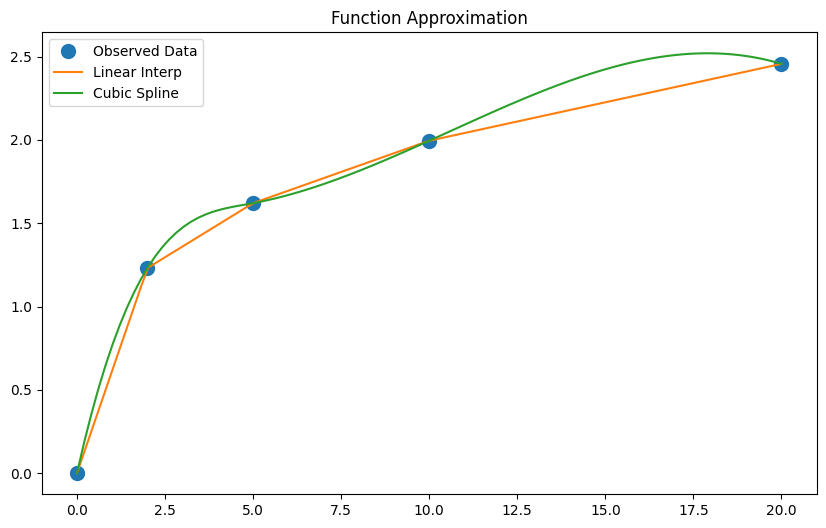

In [3]:
from scipy import interpolate

# 1. Sparse Data (The "Dots")
K_obs = np.array([0, 2, 5, 10, 20])
Y_obs = K_obs**0.3  # True process is Cobb-Douglas

# 2. Create Interpolators
f_linear = interpolate.interp1d(K_obs, Y_obs, kind='linear')
f_cubic = interpolate.interp1d(K_obs, Y_obs, kind='cubic')

# 3. Evaluate on a dense grid
K_dense = np.linspace(0, 20, 100)
Y_linear = f_linear(K_dense)
Y_cubic = f_cubic(K_dense)

# 4. Visualization
plt.figure(figsize=(10, 6))
plt.plot(K_obs, Y_obs, 'o', label='Observed Data', markersize=10)
plt.plot(K_dense, Y_linear, label='Linear Interp')
plt.plot(K_dense, Y_cubic, label='Cubic Spline')
plt.title('Function Approximation')
plt.legend()
plt.show()

# Part 4: Stochastic Processes (AR(1))

Macro models rely on shocks (productivity, demand). These are usually continuous AR(1) processes:
$$z_{t+1} = \rho z_t + \epsilon_{t+1}$$
To solve models on a computer, we often "Discretize" this into a **Markov Chain** (a finite set of states and a transition matrix).

## 1. AI-Augmented Implementation
Writing the **Tauchen Method** from scratch is tricky and prone to indexing errors. This is a perfect task for AI.

 **💡 AI Prompt Template: Tauchen Method**

"I need a Python function to implement Tauchen's method for discretizing an AR(1) process.
 **Parameters:** `rho` (persistence), `sigma_eps` (std dev of shock), `n` (number of states).
 **Returns:** `z_grid` (state values) and `P` (transition probability matrix).
 **Task:** Implement the function, then simulate the Markov chain for 1000 periods and plot the path."


In [4]:
# Simple implementation of Tauchen (or the AI might generate this)
from scipy.stats import norm

def tauchen(n, rho, sigma, m=3):
    # 1. Construct the grid
    std_y = sigma / np.sqrt(1 - rho**2)
    z_max = m * std_y
    z_min = -z_max
    z = np.linspace(z_min, z_max, n)
    step = z[1] - z[0]
    
    # 2. Construct Transition Matrix
    P = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if j == 0:
                P[i, j] = norm.cdf((z[0] - rho*z[i] + step/2) / sigma)
            elif j == n-1:
                P[i, j] = 1 - norm.cdf((z[n-1] - rho*z[i] - step/2) / sigma)
            else:
                P[i, j] = (norm.cdf((z[j] - rho*z[i] + step/2) / sigma) -
                           norm.cdf((z[j] - rho*z[i] - step/2) / sigma))
    return z, P

# Run the discretization
rho = 0.9
sigma = 0.02
n = 5
z_grid, P = tauchen(n, rho, sigma)

print("Markov States z:", z_grid)
print("Transition Matrix P (Row 0):", P[0])
print("Does Row 0 sum to 1?", np.sum(P[0]))

Markov States z: [-0.13764944 -0.06882472  0.          0.06882472  0.13764944]
Transition Matrix P (Row 0): [8.49050778e-01 1.50945377e-01 3.84555559e-06 1.22124533e-15
 0.00000000e+00]
Does Row 0 sum to 1? 1.0


## 2. Validation
A Research Architect validates the approximation by **Simulation**.
1. Simulate the discrete chain.
2. Check if the standard deviation matches the theoretical AR(1) std dev: $\sigma_z = \sigma_\epsilon / \sqrt{1-\rho^2}$.

Theoretical Std: 0.0459
Simulated Std:   0.0573
Error: 0.0114


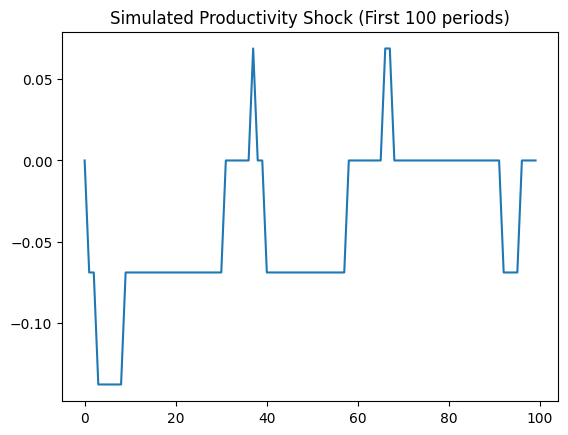

In [5]:
# Simulate
T = 5000
sim_indices = np.zeros(T, dtype=int)
current_idx = n // 2

for t in range(T):
    # Choose next state based on transition probabilities
    sim_indices[t] = np.random.choice(n, p=P[current_idx])
    current_idx = sim_indices[t]

sim_values = z_grid[sim_indices]

# Theoretical Moments
theo_std = sigma / np.sqrt(1 - rho**2)
sim_std = np.std(sim_values)

print(f"Theoretical Std: {theo_std:.4f}")
print(f"Simulated Std:   {sim_std:.4f}")
print(f"Error: {abs(theo_std - sim_std):.4f}")

plt.plot(sim_values[:100])
plt.title('Simulated Productivity Shock (First 100 periods)')
plt.show()

# Lab Summary

## Key Takeaways
1.  **Version Control:** We initialized a Git repo to save our work.
2.  **Don't Reinvent:** We used `scipy.optimize` to find roots and maximize utility, rather than writing loops.
3.  **Interpolation:** We saw how Cubic Splines create smooth approximations from sparse data.
4.  **Discretization:** We successfully turned a continuous AR(1) process into a matrix-based Markov Chain for future models.

## Next Steps
In **Lab 4**, we will pivot to **Programming Basics & PyTorch**. We will learn how to structure economic agents using **Python Classes**, solve a two-period consumption model, and get our first introduction to **PyTorch Tensors**—the data structure that powers modern AI.